In this section, we will talk about transport layer;

- Difference between TCP & UDP
- What are ports?
- What is multiplexing and demultiplexing?
- Establishment of TCP session using Wireshark
- How TCP & UDP are used in modern computer networks

## What is the purpose of Transport Layer? (Lecture 102 of Bogdan)

After transport layer, there is application layer, which hosts HTTPS, HTTP, SSH, IMAP, SMTP applications. On a host (e.g. on a phone) different applications work simultaneously. These applications communicate with transport layer and transport layer communicates with network layer. Transport layer is used to send & receive applications' data between different hosts. Transport layer could send data reliably with connection establishment and unreliably without connection establishment.

## Client & Server

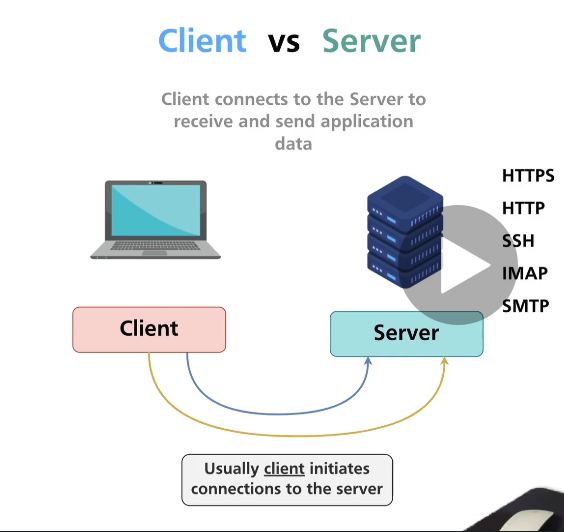

When we talk about connection establishment between two different hosts in transport layer, there are always two different sides:

- client: the one who initiatiates connection (e.g. phones)
- server: offering public services (e.g. video streaming, emailing etc) to clients. servers accept incoming connections.

Note that in the background server A can act as a client to server B and so on. We may also launch public services on one's computer and act as a server.

In the example above, server have 5 different application protocols that can be accessed. How would the server understand which application the client wants to connect to? We answer this question over the course of this section. But the responsibility is at the transport layer.

Note that client establishes the connection to the server, server exchanges data in full duplex mode with the client. When the need to communicate ends with the server, the client ends the connection with the server.

## Transport layer connection (Lecture 104 of Bogdan)

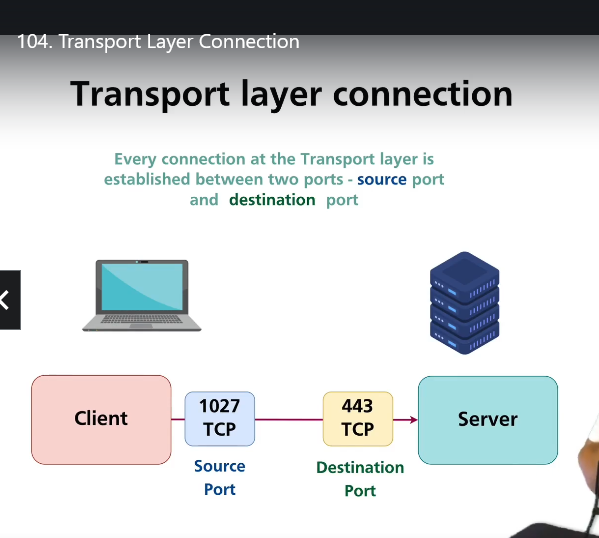

##  Application & Protocol Ports (Lecture 105 of Bogdan)

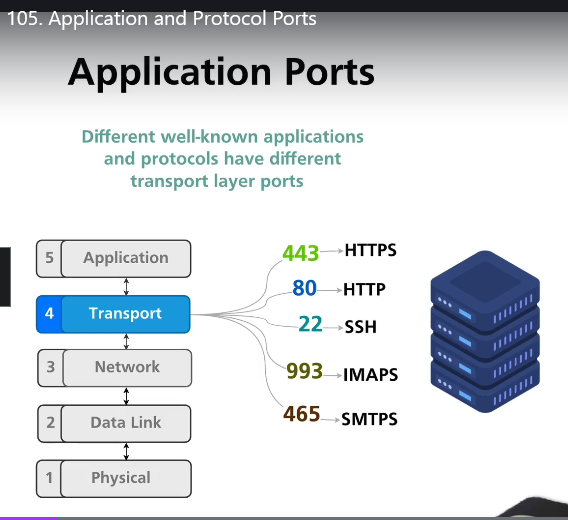

End user applications, which run on top of Application layer, (e.g. Chrome, Outlook etc)
use different application protocols. For example; Chrome uses HTTPS and HTTP protocols, which run on ports 443 and 80 respectively. When you load a webpage, different connections to different servers may be connected to load different sections of the page.

Another example is an SSH client which can utilize SSH protocol running on port 22. This client can establish an SSH session with an SSH server and manage the server. 

IMAPS or SMTPS are used to send receive mails securely.

In the example above, all these services are enabled in the same server, which is supposed to distinguish which data belongs to which protocol.
That's where PORTS come in. PORTs enable the server to differentiate which data is destined to which protocol.

## Observing How Web Browser Creates Different Connections (Lecture 106 of Bogdan)

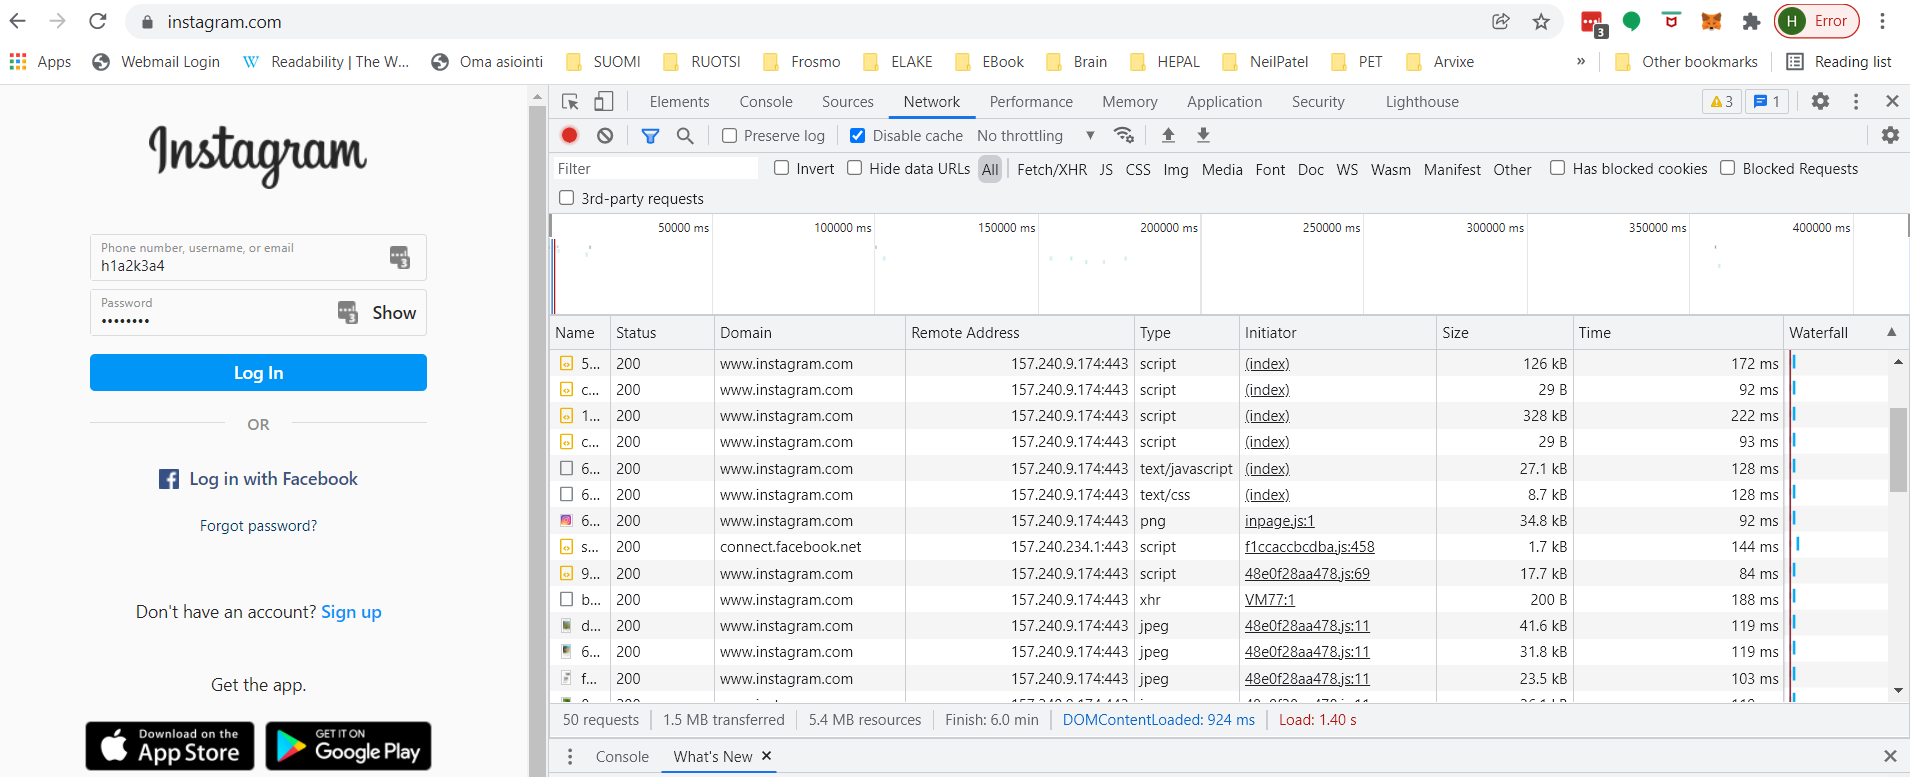

If we look at **Remote address** column in the **network** section, we see that different resources (i.e. png, css,js etc) of the same webpage are downloaded from different servers using different HTTPS connections (i.e. port 443).

## Multiplexing & Demultiplexing (Lecture 107 of Bogdan)

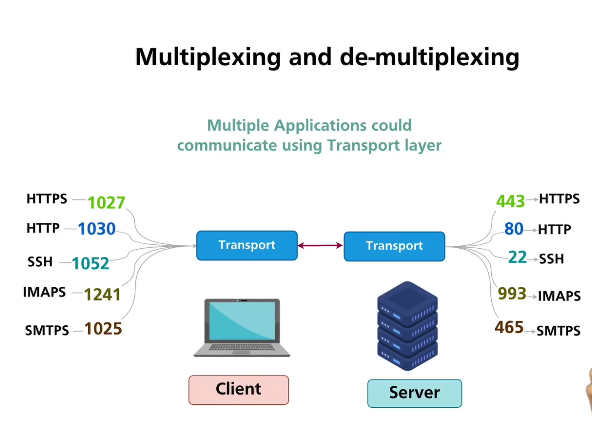

## Port Ranges ( Lecture 108 of Bogdan )

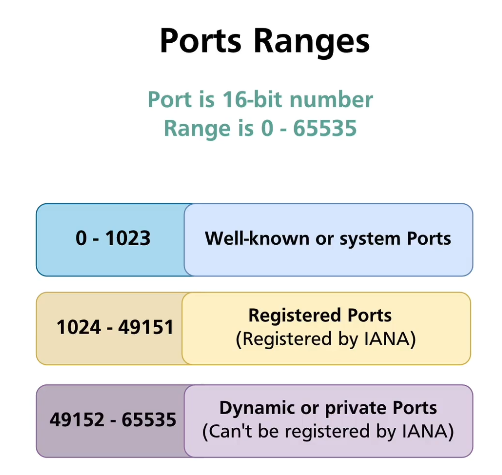

In every single connection of transport layer there is source port (client side port) and destination port (server side port). Also there may be multiple application applications running on the same server. In such case the server performs demultiplexing when it receives multiple segments from different client applications. After demultiplexing data is relayed to different application layer protocols on the server.

There are 2 fields in every transport layer segment: source port & destination port, each of which are 2 bytes (16 bits) long; There are 0-65535 ports are available. Well known system ports are for example 80 for HTTP, 443 for HTTPS, 22 for SSH, 993 for IMAPS and 465 for SMTPS. Note that these ports are only used for server side well known applications.

Imagine that you develop a custom app protocol that runs on a server. You CANT use well known system servers, nor you can use Dynamic or private ports either. You can however ask for a port number to be assigned your application. The authorithy assigning port numbers to the custom server applications is called IANA.

Which port is assigned to source port, when client initiates connection to remote server?
Client utilizes an unused port number from its system pool of port numbers excluding well known system ports.

Note that we use DECIMAL numbers to represent ports.

## What is a network socket? (Lecture 109 of Bogdan)

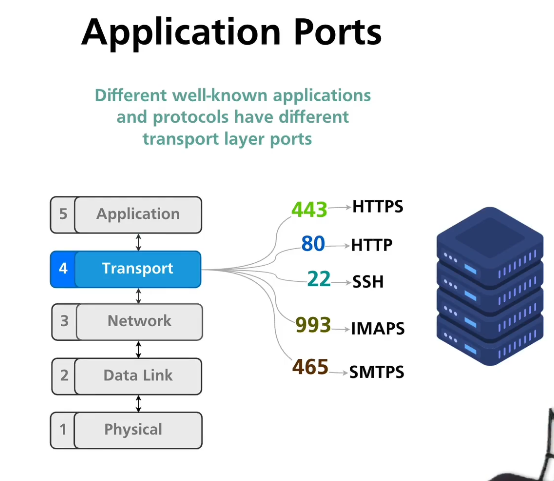

We have discussed before what client is & what server is. We know that in every single transport layer connection, there is a pair of ports. And in a server, there can be multiple application protocols up and running. And if we look at the example, somehow the server needs to open those ports to be able to accept incoming segments. In this example, 443 should be open for HTTPS, but for ports 445 or 446, if segments are received, then server should reject those segments. Because those ports should be closed at the server side. The same relates to the client; the client should have certain ports open and the other non-used ports closed. 

Network socket is a host endpoint used for outgoing and incoming data; It consists of 5 sections;

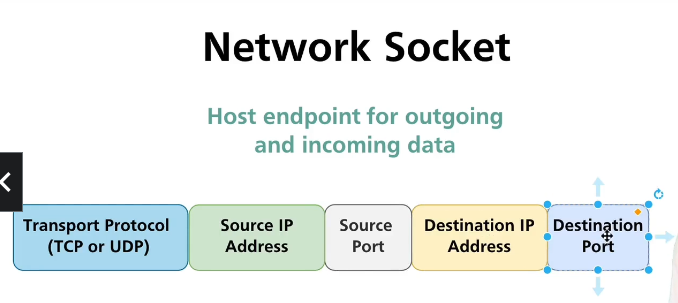

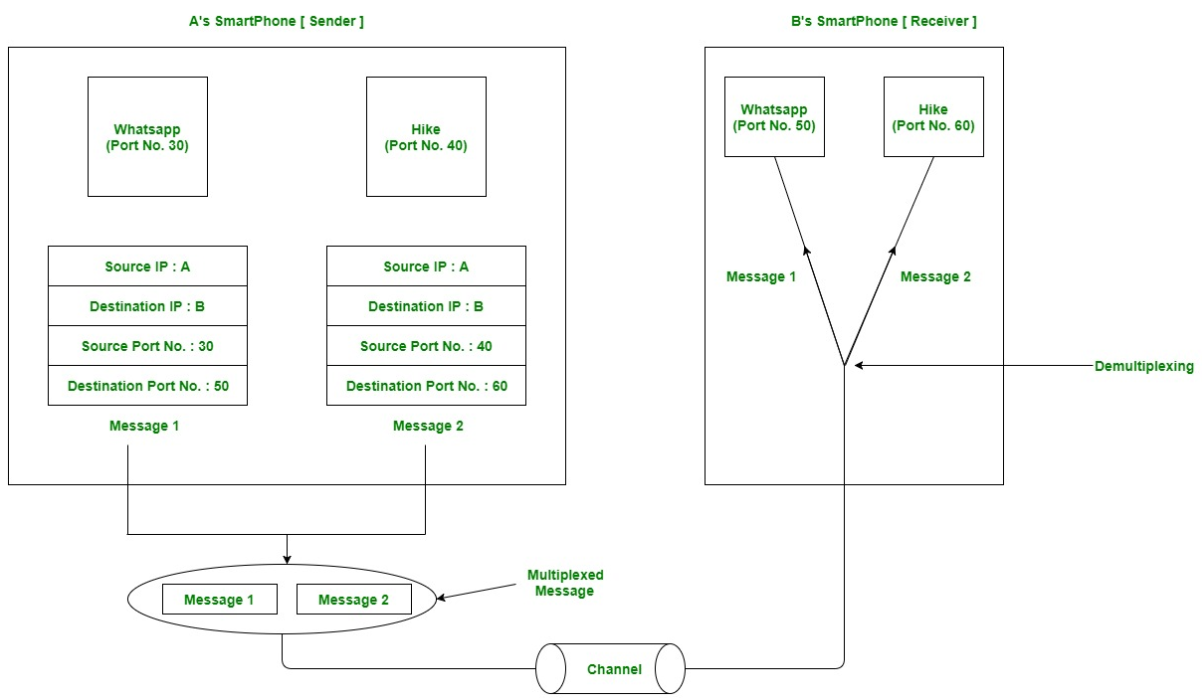

## Examples of Network Sockets ( Lecture 110 of Bogdan )

At any moment of time, there may be multiple sockets created/removed dynamically

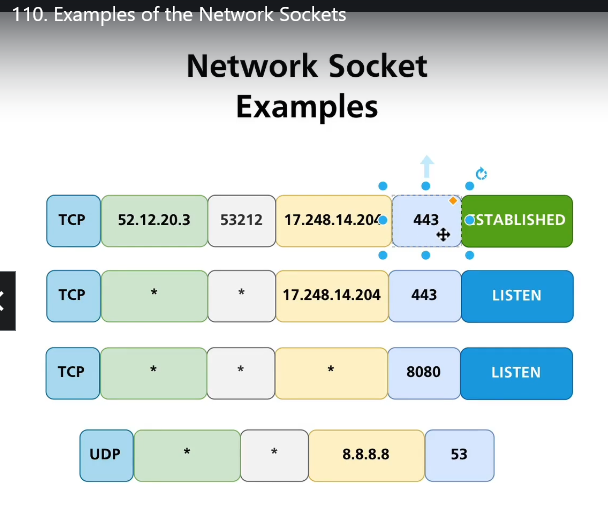

The above example shows available sockets at a given point in time. 

The last field (e.g. ESTABLISHED, LISTEN) shows the state of the socket.

When a frame is received at the server, it is decapsulated at the data link layer,
network (internet) layer. Then the server has a look at the decapsulation result (i.e.
transport layer header; if it sees

source ip address as 52.12.20.3
source port as 53212
destination ip address as 17.248.14.204
destination port as 443

Then server finds an existing socket matching those, and server understands that
it needs to process this specific ip packet from the client.

Every single socket on the server is created by a specific application (e.g. SMTPS, IMAPS, SSH,
HTTP or HTTPS etc). If there is a match between transport header parameters (of a segment) and IP socket, then server sends the payload to the corresponding application that has created corresponding
socket. If for example, there is no match between transport header parameters (of a segment), such as
a destination port 500, then such segment will be silently discarded.


Lets focus on the second socket on the example; where source/client can have any IP address and any IP port (designated by wildcart * ).

On the third socket, server can accept any TCP packet from source/client having any IP address and any IP port. The destination/server IP address can be any IP address configured on the server (designated by wildcard *. The destination port must be 8080.

Given the example; multiple sockets/connections can be opened at the same port simultaneously. Lets talk about this next.